In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

*Load the dataset

In [2]:
df = pd.read_csv("/content/archive (6).zip")

In [29]:
df.head()

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn
0,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,37,Male,0
1,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,37,Male,0
2,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,37,Male,0
3,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,37,Male,0
4,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,49,Female,1


**Data cleaning**

In [25]:
# Get the actual column names of the DataFrame
actual_columns = df.columns.tolist()
print(actual_columns)

# Check if 'Customer ID' or a similar name is in the list of columns

# If the column name is found, use the exact name:
if "Customer ID" in actual_columns:
    df.drop(columns=["Customer ID"], inplace=True)
# If a similar column name is found, use that instead:
elif "CustomerID" in actual_columns:
    df.drop(columns=["CustomerID"], inplace=True)
# If no related column name is found, handle accordingly:
else:
    print("Column not found. Please check the column names in your DataFrame.")

['Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Age', 'Gender', 'Churn']
Column not found. Please check the column names in your DataFrame.


In [19]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"]) # Assign to the column in the DataFrame

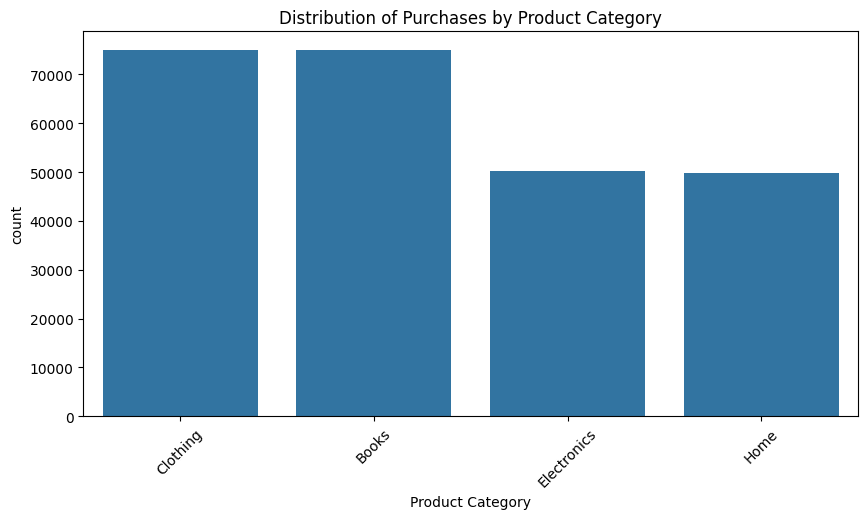

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Product Category", order=df["Product Category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Purchases by Product Category")
plt.show()

In [28]:
# Get the actual column names of the DataFrame
actual_columns = df.columns.tolist()
print(actual_columns)

# Check if 'Customer ID' or a similar name is in the list of columns

# If the column name is found, use the exact name:
if "Customer ID" in actual_columns:
    df.drop(columns=["Customer ID"], inplace=True)
# If a similar column name is found, use that instead:
elif "CustomerID" in actual_columns:
    df.drop(columns=["CustomerID"], inplace=True)
# If no related column name is found, handle accordingly:
else:
    print("Column not found. Please check the column names in your DataFrame.")

['Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Age', 'Gender', 'Churn']
Column not found. Please check the column names in your DataFrame.


In [30]:
X = df[["Age", "Total Purchase Amount", "Quantity", "Returns"]]
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6936
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     40016
           1       0.20      0.18      0.19      9984

    accuracy                           0.69     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.68      0.69      0.69     50000



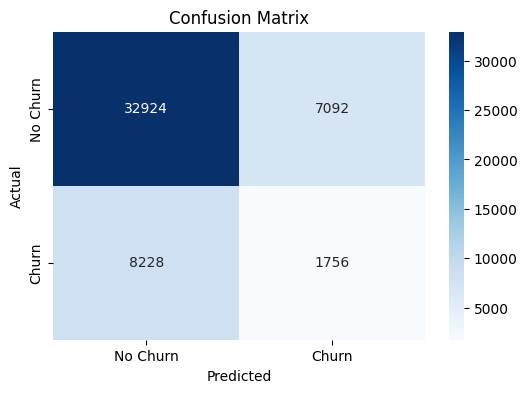

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# ... (rest of your code) ...

plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-36-10a534c42f35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=[features[i] for i in indices], palette="viridis")


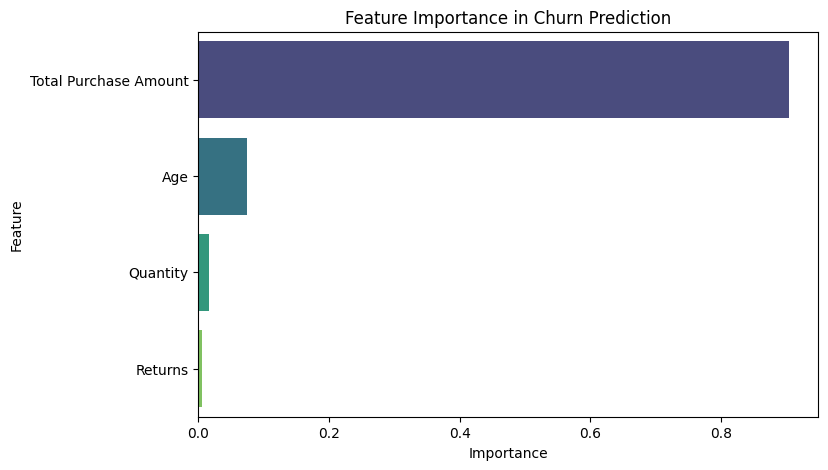

In [36]:
eature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances[indices], y=[features[i] for i in indices], palette="viridis")
plt.title("Feature Importance in Churn Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
